In [1]:
import pandas as pd
import numpy as np

In [2]:
Train_data = pd.read_csv('Clean_train_dataset.csv')
Train_data

,Ratings,No_of_ratings,Screen_size(inches),Processor_speed(GHz),Cache_memory(MBs),RAM(Gig),RAM_max,Memory_slots,RAM_speed(MHz),Harddrive_capacity(Gig),...,Battery_type,Fingerprint,Processor_brand,Graphics_brand,USB(2.0),Bluetooth_,USB(typeC),Keyboard_backlit,Harddrive_type,Brand
0,3.98,554,15.6,1.10,4,4,12,1,2400,256,...,Li-Ion,No,Intel,Intel Graphics,Yes,Yes,Yes,no,SSD,Lenovo
1,4.34,346,14.0,1.60,6,16,27,2,3200,512,...,Li-Po,No,Intel,Intel Graphics,Yes,Yes,Yes,no,SSD,Lenovo
2,4.50,55,13.3,1.30,4,8,17,1,1866,512,...,Li-Ion,No,Intel,Intel Graphics,Yes,Yes,No,no,HDD,Acer
3,4.07,86,14.0,1.60,6,2,16,1,2400,1000,...,Li-Ion,Yes,Intel,NVIDIA,Yes,Yes,No,no,HDD,Lenovo
4,4.50,1977,14.0,2.10,6,8,13,1,2400,1000,...,Li-Ion,No,AMD,AMD Graphics,Yes,Yes,Yes,no,HDD,HP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,4.40,40,15.6,2.80,12,2,16,1,3147,512,...,Li-Ion,No,Intel,NVIDIA,Yes,Yes,Yes,yes,SSD,Lenovo
1032,4.40,21,15.6,2.90,12,8,32,2,3200,1000,...,Li-Ion,No,AMD,NVIDIA,Yes,Yes,Yes,yes,HDD,Asus
1033,3.92,3,15.6,1.30,8,2,8,1,2533,512,...,Li-Ion,Yes,Intel,NVIDIA,Yes,Yes,Yes,no,SSD,Asus
1034,4.29,170,14.0,3.47,8,8,30,1,4266,512,...,Li-Ion,No,Intel,Intel Graphics,Yes,Yes,Yes,yes,SSD,Asus


In [3]:
#declaring targets and inputs and creating dummy variables
x_train = Train_data.drop('Brand',axis = 1)
y_train = Train_data['Brand']
x_train_final = pd.get_dummies(x_train)

In [4]:
#Gettting the holdoutset and creating dummy variables
test_data = pd.read_csv('Clean_holdout_dataset.csv')
x_test = test_data.drop('Brand',axis = 1)
y_test = test_data['Brand']
x_test_final = pd.get_dummies(x_test)

In [5]:
#retriving the dummies not found in x_test due to imbalanced data
a = x_train_final.columns
b = x_test_final.columns
for i in a:
    if i not in b:
        print(i)

Display_type_ LCD 
Display_type_ QLED 
Processor_brand_Apple
Graphics_brand_MediaTek Graphics
Graphics_brand_PowerVR Graphics


In [6]:
#retriving the dummies not found in x_train due to imbalanced data
a = x_train_final.columns
b = x_test_final.columns
for i in b:
    if i not in a:
        print(i)

Processor_brand_Qualcomm
Graphics_brand_Qualcomm Graphics


In [7]:
#Clearly the data was imbalanced as these data entries were on present in each data subset
# so will add all missing dummies to each corresponding data set that they are not found in, but with value 0
feature_list1 = ['Display_type_ LCD ', 
'Display_type_ QLED ',
'Processor_brand_Apple',
'Graphics_brand_MediaTek Graphics',
'Graphics_brand_PowerVR Graphics']

for i in feature_list1:
    x_test_final[i] = 0

In [8]:
feature_list2 = ['Processor_brand_Qualcomm',
'Graphics_brand_Qualcomm Graphics']

for i in feature_list2:
    x_train_final[i] = 0

In [9]:
#since data is not balanced I will use SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

In [10]:
#Applying smote
x_smote,y_smote = smote.fit_resample(x_train_final,y_train)

#Checking if smote was applied correctly
print('Before smote :',Counter(y_train))
print('After smote :',Counter(y_smote))

Before smote : Counter({'Asus': 283, 'Lenovo': 269, 'HP': 202, 'Acer': 105, 'Dell': 85, 'MSI': 50, 'Microsoft': 14, 'Apple': 11, 'Avita': 10, 'Samsung': 7})
After smote : Counter({'Lenovo': 283, 'Acer': 283, 'HP': 283, 'Asus': 283, 'Apple': 283, 'MSI': 283, 'Dell': 283, 'Microsoft': 283, 'Samsung': 283, 'Avita': 283})


In [11]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_smote)

In [12]:
scaled_x_train.shape

(2830, 63)

In [13]:
#rearrenging the x_test_final columns to be in same order as x_train_final
x_test_final2 = x_test_final[['Ratings', 'No_of_ratings', 'Screen_size(inches)',
       'Processor_speed(GHz)', 'Cache_memory(MBs)', 'RAM(Gig)', 'RAM_max',
       'Memory_slots', 'RAM_speed(MHz)', 'Harddrive_capacity(Gig)',
       'Weight(kg)', 'Warranty', 'Adapter(watts)', 'Battery_cells',
       'Screen_pixel_density(width)', 'Screen_pixel_density(height)',
       'Processor_cores', 'Length(mm)', 'Width(mm)', 'Height(mm)',
       'USB(2.0)_ports', 'Bluetooth_version', 'USB(typeC)_ports',
       'Operating_system_ DOS ', 'Operating_system_ Google Chrome ',
       'Operating_system_ Linux ', 'Operating_system_ Ubuntu ',
       'Operating_system_MAC', 'Operating_system_Windows',
       'Display_type_ AMOLED ', 'Display_type_ LCD ', 'Display_type_ LED ',
       'Display_type_ OLED ', 'Display_type_ QLED ', 'Touchscreen_ No ',
       'Touchscreen_ Yes ', 'Optical_Drive_No', 'Optical_Drive_Yes',
       'Battery_type_Li-Ion', 'Battery_type_Li-Po', 'Fingerprint_No',
       'Fingerprint_Yes', 'Processor_brand_AMD', 'Processor_brand_Apple',
       'Processor_brand_Intel', 'Processor_brand_MediaTek',
       'Graphics_brand_AMD Graphics', 'Graphics_brand_ARM Graphics',
       'Graphics_brand_Intel Graphics', 'Graphics_brand_MediaTek Graphics',
       'Graphics_brand_NVIDIA', 'Graphics_brand_PowerVR Graphics',
       'USB(2.0)_Yes', 'Bluetooth__No', 'Bluetooth__Yes', 'USB(typeC)_No',
       'USB(typeC)_Yes', 'Keyboard_backlit_no', 'Keyboard_backlit_yes',
       'Harddrive_type_HDD', 'Harddrive_type_SSD', 'Processor_brand_Qualcomm',
       'Graphics_brand_Qualcomm Graphics']]

In [14]:
#transforming the test data
scaled_x_test = scaler.transform(x_test_final2)

In [15]:
scaled_x_test.shape

(444, 63)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score

## Logistic Regression

In [17]:
#hyper parameter tuning

log=LogisticRegression(random_state=1,max_iter=400)
params={'C':[0.01,0.1,1,10,100],
        'penalty':['l1','l2','elasticnet'],
        'multi_class':['ovr','multinomial'],
        'solver':['lbfgs','liblinear','saga']}
rand = RandomizedSearchCV(log,params,cv=10,scoring='accuracy')
rand.fit(scaled_x_train,y_smote)

C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\ana

C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\ana

C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\ana

RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(max_iter=400, random_state=1),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   scoring='accuracy')

In [18]:
rand.best_estimator_

LogisticRegression(C=100, max_iter=400, multi_class='multinomial', penalty='l1',
                   random_state=1, solver='saga')

In [19]:
rand.best_score_

0.7780918727915195

In [20]:
#Model training
log=LogisticRegression(C=100, max_iter=400, multi_class='multinomial', penalty='l1',
                   random_state=1, solver='saga')

log.fit(scaled_x_train,y_smote)
pred=log.predict(scaled_x_test)

#Model evaluation
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 8  0  9  0  7  8  9  2  1  1]
 [ 0  5  0  0  0  0  0  0  0  0]
 [16  0 58  3  7 10 19  8  0  0]
 [ 0  0  1  3  0  0  0  0  0  0]
 [ 3  0  1  0 19  3 11  0  0  0]
 [12  0  8  3  4 34 24  1  0  0]
 [ 5  0 12  1  4 18 74  2  0  0]
 [ 0  0  4  0  2  2  2 11  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  1  0  0  0  2]]
              precision    recall  f1-score   support

        Acer       0.18      0.18      0.18        45
       Apple       1.00      1.00      1.00         5
        Asus       0.62      0.48      0.54       121
       Avita       0.30      0.75      0.43         4
        Dell       0.44      0.51      0.48        37
          HP       0.45      0.40      0.42        86
      Lenovo       0.53      0.64      0.58       116
         MSI       0.46      0.52      0.49        21
   Microsoft       0.86      1.00      0.92         6
     Samsung       0.67      0.67      0.67         3

    accuracy                           0.50       444
   macro avg       

C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
#for tree based algorithms,will use the unscaled data since scaling is not mandatory for these models

## Random forest classifier

In [22]:
#Hyper parameter tuning

params={'n_estimators':[100,200,300,400],
        'max_features':['auto','sqrt','log2'],
        'max_depth':[10,120,200,340,450],
        'min_samples_split':[2,3,5,7,9],
        'criterion':['entropy','gini'],
        'min_samples_leaf':[2,4,6,8]}
rf=RandomForestClassifier()
rand=RandomizedSearchCV(rf,params,cv=10,scoring='accuracy',n_jobs=-1,n_iter=5,verbose=3)
rand.fit(x_smote,y_smote)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 200, 340, 450],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy', verbose=3)

In [23]:
rand.best_estimator_

RandomForestClassifier(max_depth=450, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=400)

In [24]:
rand.best_score_

0.9010600706713779

In [25]:
#Model training
rf=RandomForestClassifier(max_depth=450, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=400)
rf.fit(x_smote,y_smote)
pred=rf.predict(x_test_final2)

#Model evaluation
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[25  0  5  0  0  2 10  2  1  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 3  0 97  1  1  6  5  6  0  2]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  4  1 24  2  5  0  1  0]
 [ 4  0  7  3  2 65  5  0  0  0]
 [ 3  0 11  0  3 14 83  1  1  0]
 [ 0  0  3  0  2  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  1  2]]
              precision    recall  f1-score   support

        Acer       0.71      0.56      0.63        45
       Apple       1.00      1.00      1.00         5
        Asus       0.76      0.80      0.78       121
       Avita       0.44      1.00      0.62         4
        Dell       0.75      0.65      0.70        37
          HP       0.73      0.76      0.74        86
      Lenovo       0.77      0.72      0.74       116
         MSI       0.64      0.76      0.70        21
   Microsoft       0.60      1.00      0.75         6
     Samsung       0.50      0.67      0.57         3

    accuracy                           0.74       444
   macro avg       

## XGBoost Classifier

In [26]:
#Hyper parameter tuning

paramsxg={
    'learning_rate':[0.05,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,7,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0,0.1,0.2,0.3,0.4],
    'eta':[0.01,0.05,0.2,0.8,1,1.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7,0.8]}
xg=XGBClassifier()
randomer=RandomizedSearchCV(xg,param_distributions=paramsxg,n_iter=5,n_jobs=-1,verbose=3,cv=10,scoring='accuracy')
randomer.fit(x_smote,y_smote)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\pc\anaconda3\envs\laptopclassifier\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [27]:
randomer.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.2, gamma=0.3,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
randomer.best_score_

0.9441696113074205

In [29]:
#Model training
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.2, gamma=0.3,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xg.fit(x_smote,y_smote)
pred=xg.predict(x_test_final2)

#Model evaluation
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[01:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 35   0   2   0   0   1   5   1   1   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  2   0 112   0   0   1   5   1   0   0]
 [  0   0   0   3   0   0   1   0   0   0]
 [  1   0   3   0  26   1   6   0   0   0]
 [  1   0   3   1   1  78   2   0   0   0]
 [  2   0   5   0   1   7 100   0   1   0]
 [  0   0   2   0   1   0   0  18   0   0]
 [  0   0   0   0   0   0   0   0   6   0]
 [  0   0   1   0   0   0   0   0   0   2]]
              precision    recall  f1-score   support

        Acer       0.85      0.78      0.81        45
       Apple       1.00      1.00      1.00         5
        Asus       0.88      0.93      0.90       121
       Avita       0.75      0.75      0.

In [31]:
#The xgboost clearly is the best model for this case with an accuracy of 86.7%.

<AxesSubplot:>

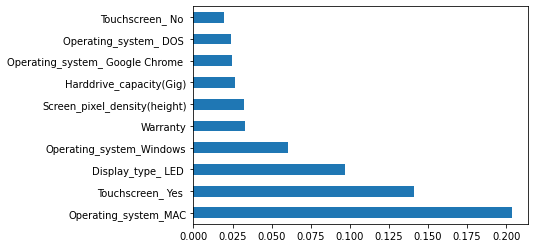

In [32]:
# Top 10 Feature importance rank using xgboost classifier
rank=pd.Series(xg.feature_importances_,index=x_train_final.columns)
rank.nlargest(10).plot(kind='barh')

## Conclusion

In [33]:
#The operating system,Touchscreen,screen pixel density,display_type and harddrive capacity seem to rank high as laptop features 
# that differentiate brands. This shows that there is not a lot of technological differences that set aside these brands from  
#each other.This is due to the fact that every laptop can have different operating system installed in it after being purchased,
#nowadays external harddrives compensate for low internal harddrive capacity, only leaving display type,screen pixel density 
#and touch screen technology. If perfomance is the objective then almost any brand can provide that optimal perfomance but if
#screen technology is the priority then certain brands have better technology for those needs such as Apple and microsoft.